# Debugging

`PreprocessData` step is unable to find the output files from `Ingest` step.

Use the `PipelineRun` to debug.

In [2]:
from azureml.core import Workspace, Experiment
from azureml.pipeline.core import PipelineRun, StepRun, PortDataReference

In [18]:
# select experiment/run
exp_name = 'arXiv-NMT'
run_id = '0c5d8282-8cfd-4556-9905-c10f9fbc993a'


# load workspace
ws = Workspace.from_config()

# grab experiment
exp = Experiment(workspace=ws, name=exp_name)

# grab pipeline run
pipeline_run = PipelineRun(experiment=exp, run_id=run_id)

# peek at step details
for step in pipeline_run.get_steps():
    print('Output of step', step.name)
    
    # dict of StepRunOutputs with key = output name
    output_dict = step.get_outputs()
    
    for name, output in output_dict.items():
        
        output_ref = output.get_port_data_reference()
        print('\tname', name)
        print('\tdatastrore', output_ref.datastore_name)
        print('\tpath on datastore', output_ref.path_on_datastore)
        
# download specified output data to local path
LOCAL_PATH = '.'

step_run = pipeline_run.find_step_run("Ingest")[0]
port_data_reference = step_run.get_output_data("raw_data_dir")
port_data_reference.download(LOCAL_PATH)

Output of step Preprocess Data
Output of step Ingest
	name raw_data_dir
	datastrore workspaceblobstore
	path on datastore azureml/97dfb707-1b28-4dfa-900b-059ac44208bd/raw_data_dir


0

But I see the files landing here:

Visit [here](https://portal.azure.com/#blade/Microsoft_Azure_Storage/ContainerMenuBlade/overview/storageAccountId/%2fsubscriptions%2f48bbc269-ce89-4f6f-9a12-c6f91fcb772d%2fresourcegroups%2famsaied-dsvm-rg%2fproviders%2fmicrosoft.storage%2fstorageaccounts%2famsaieddstoragec8b66a066/path/azureml-blobstore-9d10b9cb-7661-435f-bd27-75685c95a33d) and search for

```
azureml/538ad847-3ac6-4ae5-a290-58ba2804b729/raw_data_dir
```

to see:

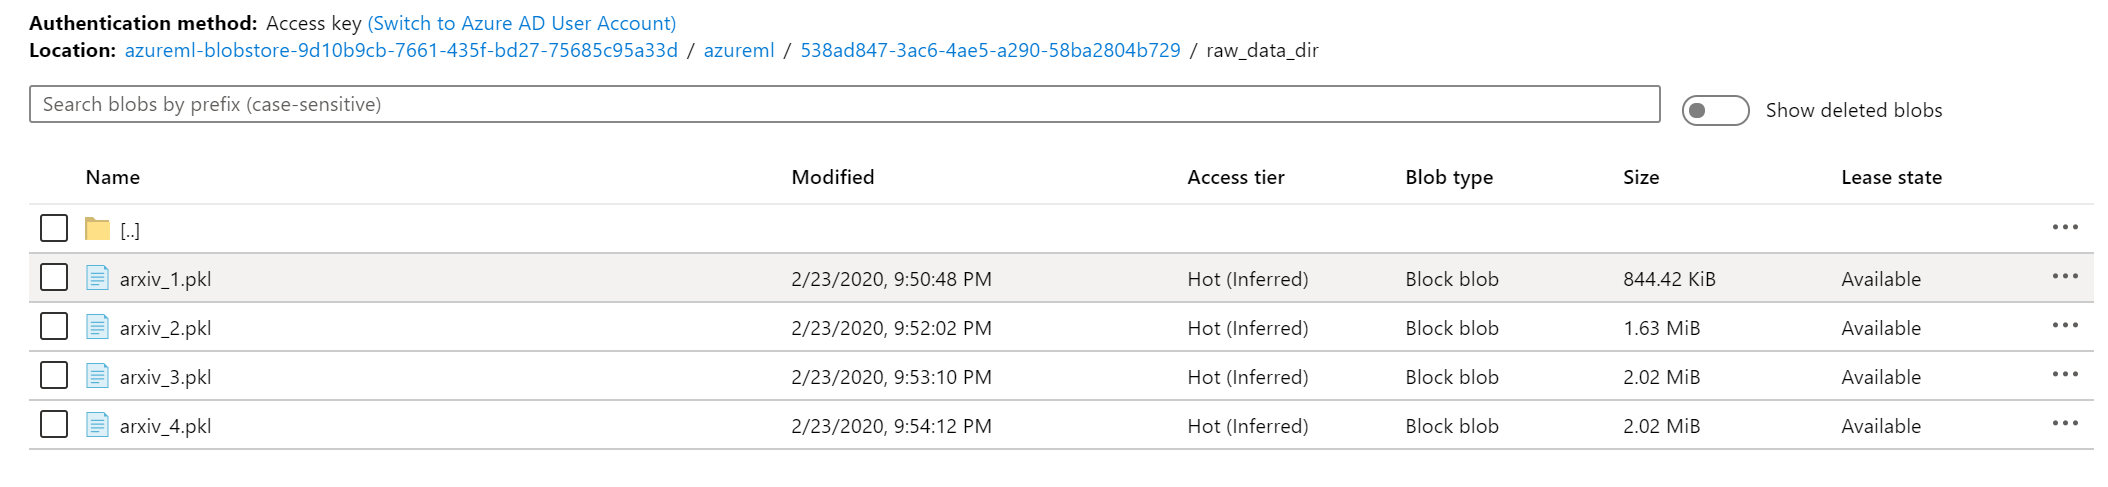

In [21]:
# select experiment/run
exp_name = 'Object-Recognition-Demo'
run_id = '4ec230e3-90b7-4ee6-b5f9-c1b660a62ad3'


# load workspace
ws = Workspace.from_config()

# grab experiment
exp = Experiment(workspace=ws, name=exp_name)

# grab pipeline run
pipeline_run = PipelineRun(experiment=exp, run_id=run_id)

# peek at step details
for step in pipeline_run.get_steps():
    print('Output of step', step.name)
    
    # dict of StepRunOutputs with key = output name
    output_dict = step.get_outputs()
    
    for name, output in output_dict.items():
        
        output_ref = output.get_port_data_reference()
        print('\tname', name)
        print('\tdatastrore', output_ref.datastore_name)
        print('\tpath on datastore', output_ref.path_on_datastore)
        
# download specified output data to local path
LOCAL_PATH = '.'

step_run = pipeline_run.find_step_run("Data Ingestion")[0]
port_data_reference = step_run.get_output_data("raw_data_dir")
port_data_reference.download(LOCAL_PATH)

WARNING - Retrying (Retry(total=2, connect=2, read=3, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CB7394C748>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /api/v1.0/subscriptions/48bbc269-ce89-4f6f-9a12-c6f91fcb772d/resourceGroups/amsaied-dsvm-rg/providers/Microsoft.MachineLearningServices/workspaces/amsaied-dsvm-ws/DataTypes
WARNING - Retrying (Retry(total=1, connect=1, read=3, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CB7394C2E8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /api/v1.0/subscriptions/48bbc269-ce89-4f6f-9a12-c6f91fcb772d/resourceGroups/amsaied-dsvm-rg/providers/Microsoft.MachineLearningServices/workspaces/amsaied-dsvm-ws/DataTypes


Output of step Deploy Model
	name scoring_url
	datastrore workspaceblobstore
	path on datastore azureml/f9372656-24ed-4437-818a-e4ca7a3dd577/scoring_url
Output of step Evaluate Model
	name accuracy_file
	datastrore workspaceblobstore
	path on datastore azureml/681880d4-de30-486e-996c-c4e0a099997b/accuracy_file
Output of step Train Model
	name model_dir
	datastrore workspaceblobstore
	path on datastore azureml/4a66d2f2-3c65-443d-99dc-64185f724a7f/model_dir
Output of step Preprocess Data
	name test_dir
	datastrore workspaceblobstore
	path on datastore azureml/54713d01-0d14-4acc-900a-ca7ec40b7354/test_dir
	name valid_dir
	datastrore workspaceblobstore
	path on datastore azureml/54713d01-0d14-4acc-900a-ca7ec40b7354/valid_dir
	name train_dir
	datastrore workspaceblobstore
	path on datastore azureml/54713d01-0d14-4acc-900a-ca7ec40b7354/train_dir
Output of step Data Ingestion
	name raw_data_dir
	datastrore workspaceblobstore
	path on datastore azureml/35de20cd-f871-4b86-87a7-00dd1597b9b1/raw_

WARNING - Retrying (Retry(total=2, connect=2, read=3, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CB73AE5B00>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /api/v1.0/subscriptions/48bbc269-ce89-4f6f-9a12-c6f91fcb772d/resourceGroups/amsaied-dsvm-rg/providers/Microsoft.MachineLearningServices/workspaces/amsaied-dsvm-ws/PipelineRuns/4ec230e3-90b7-4ee6-b5f9-c1b660a62ad3
WARNING - Retrying (Retry(total=1, connect=1, read=3, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001CB73B0C048>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',)': /api/v1.0/subscriptions/48bbc269-ce89-4f6f-9a12-c6f91fcb772d/resourceGroups/amsaied-dsvm-rg/providers/Microsoft.MachineLearningServices/workspaces/amsaied-dsvm-ws/PipelineRuns/4ec230e3-90b7-4ee6-b5f9-c1b660a62ad3


1010